# Zomato Exploratory Data Analysis

The main objective is to analyse the business problem of zomato to get a fair idea about factors affecting the establishments of the restaurants at different places in Bengaluru. This model aids in unlocking patterns or trends to further define the restaurants' KPIs (Key Performance Indicators).

**Importing Libraries**

In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Datasets**

In [380]:
dataset = pd.read_csv('zomato.csv')
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [381]:
dataset.shape

(51717, 17)

In [382]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**Data Preprocessing**

In [383]:
#reading column names
dataset.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [384]:
#deleting unnecessary columns
zomato = dataset.drop(['url','phone','dish_liked','menu_item','address', 'reviews_list','listed_in(city)'],axis=1)

In [385]:
#changing column names for conveniency
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type'})
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'type'],
      dtype='object')

In [386]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   cost          51371 non-null  object
 9   type          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [387]:
#transforming cost 

def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
zomato['cost'] = zomato['cost'].apply(handlecomma)
zomato['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [388]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [389]:
#removing unnecessary values from rate column
def transform_rate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)


zomato['rate'] = zomato['rate'].apply(transform_rate)
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [390]:
#removing duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [ ]:
#removing NaN values
zomato.isnull().sum()

In [391]:
#replacing null rate values
zomato['rate'].fillna(zomato['rate'].mean(), inplace = True)
zomato['rate'].isnull().sum()

0

In [392]:
zomato.dropna(inplace=True)

In [393]:
zomato.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
type            0
dtype: int64

In [394]:
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [395]:
#Cleaning rest_types column
rest_types = zomato['rest_type'].value_counts(ascending  = False)
rest_types

Quick Bites                   10911
Casual Dining                  6963
Cafe                           2372
Dessert Parlor                 1348
Delivery                       1324
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [396]:
#Catagorising restaurants less than 1000 frequency as others
def handle_rest_type(value):
    if(value in rest_types[rest_types<1000]):
        return 'others'
    else:
        return value
        
zomato['rest_type'] = zomato['rest_type'].apply(handle_rest_type)
zomato['rest_type'].value_counts()

Quick Bites           10911
others                 7623
Casual Dining          6963
Cafe                   2372
Dessert Parlor         1348
Delivery               1324
Takeaway, Delivery     1074
Name: rest_type, dtype: int64

In [397]:
#Cleaning location column
location = zomato['location'].value_counts(ascending  = False)
location

BTM                     2064
Whitefield              1805
Indiranagar             1659
HSR                     1601
Marathahalli            1524
                        ... 
Kengeri                    5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: location, Length: 93, dtype: int64

In [398]:
#Catagorising locations less than 400 frequency as others
def handle_location(value):
    if(value in location[location<400]):
        return 'others'
    else:
        return value
        
zomato['location'] = zomato['location'].apply(handle_location)
zomato['location'].value_counts()

others                   6900
BTM                      2064
Whitefield               1805
Indiranagar              1659
HSR                      1601
Marathahalli             1524
Koramangala 5th Block    1421
JP Nagar                 1320
Electronic City          1212
Jayanagar                1099
Bannerghatta Road        1017
Bellandur                 994
Sarjapur Road             867
Brigade Road              614
New BEL Road              582
Banashankari              559
Malleshwaram              550
Kalyan Nagar              550
Brookefield               528
Koramangala 4th Block     519
MG Road                   518
Koramangala 7th Block     510
Koramangala 6th Block     504
Ulsoor                    495
Rajajinagar               458
Frazer Town               441
Koramangala 1st Block     437
Church Street             434
Basavanagudi              433
Name: location, dtype: int64

In [399]:
#Cleaning cuisines column
cuisines = zomato['cuisines'].value_counts(ascending  = False)
cuisines

North Indian                                                   1709
North Indian, Chinese                                          1374
South Indian                                                   1071
Bakery, Desserts                                                540
Biryani                                                         508
                                                               ... 
Andhra, Hyderabadi                                                1
North Indian, South Indian, Kerala, Chinese                       1
South Indian, Kebab, Chinese, Biryani                             1
Asian, Continental, Mediterranean, Salad, American, Biryani       1
North Indian, Chinese, Arabian, Momos                             1
Name: cuisines, Length: 2704, dtype: int64

In [400]:
#Catagorising locations less than 400 frequency as others
def handle_cuisines(value):
    if(value in cuisines[cuisines<100]):
        return 'others'
    else:
        return value
        
zomato['cuisines'] = zomato['cuisines'].apply(handle_cuisines)
zomato['cuisines'].value_counts()

others                                              18616
North Indian                                         1709
North Indian, Chinese                                1374
South Indian                                         1071
Bakery, Desserts                                      540
Biryani                                               508
Fast Food                                             424
South Indian, North Indian, Chinese                   422
Cafe                                                  386
Desserts                                              385
Bakery                                                341
Chinese                                               308
Ice Cream, Desserts                                   277
Mithai, Street Food                                   234
Chinese, North Indian                                 217
North Indian, Chinese, Biryani                        211
Desserts, Ice Cream                                   210
North Indian, 

**Data visualization**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Koramangala 5th Block'),
  Text(11, 0, 'Koramangala 7th Block'),
  Text(12, 0, 'Koramangala 4th Block'),
  Text(13, 0, 'Bellandur'),
  Text(14, 0, 'Sarjapur Road'),
  Text(15, 0, 'Whitefield'),
  Text(16, 0, 'Indiranagar'),
  Text(17, 0, 'Koramangala 1st Block'),
  Text(18, 0, 'Frazer Town'),
  Text(19, 0, 'MG Road'),
  Text(20, 0, 'Brigade Road'),
  Text(21, 0, 'Church Street'),
  Text(22, 0, 'Ulsoor'),
  Text(23, 0, 'Malleshwaram'),
  Text(24, 0, 'Koramangala 6th Block'),
  Text(25, 0, 'Brookefield'),
  Text(26, 0, 'Rajajinagar'),
  Text(27, 0, 'Kalyan Nagar'),
  Te

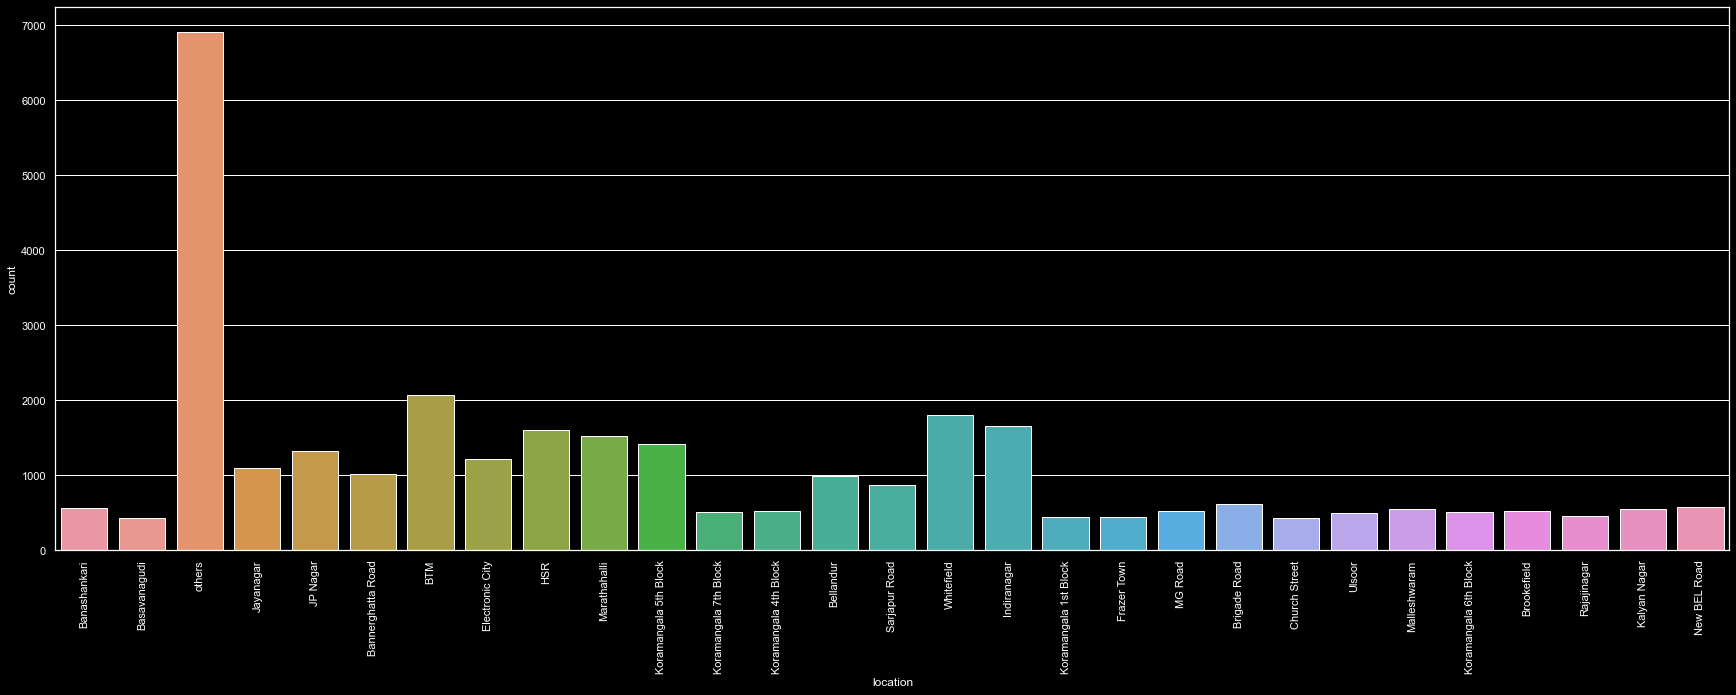

In [413]:
#Count plot of various locations
plt.style.use('dark_background')

plt.figure(figsize = (30,10))
sns.countplot(x='location',data = zomato)
plt.xticks(rotation=90)


<AxesSubplot:xlabel='online_order', ylabel='count'>

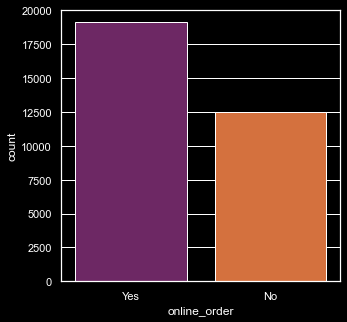

In [439]:
#Count plot of online orders
plt.figure(figsize = (5,5))
sns.countplot(x='online_order',data = zomato, palette='inferno')

<AxesSubplot:xlabel='book_table', ylabel='count'>

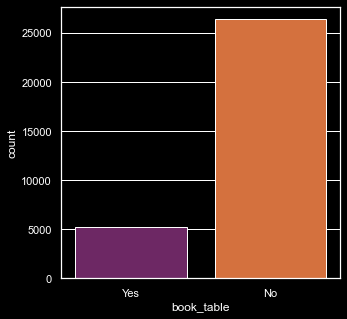

In [419]:
#Visualizing book_tables
plt.figure(figsize = (5,5))
sns.countplot(x='book_table',data = zomato, palette='inferno')

<AxesSubplot:xlabel='type', ylabel='count'>

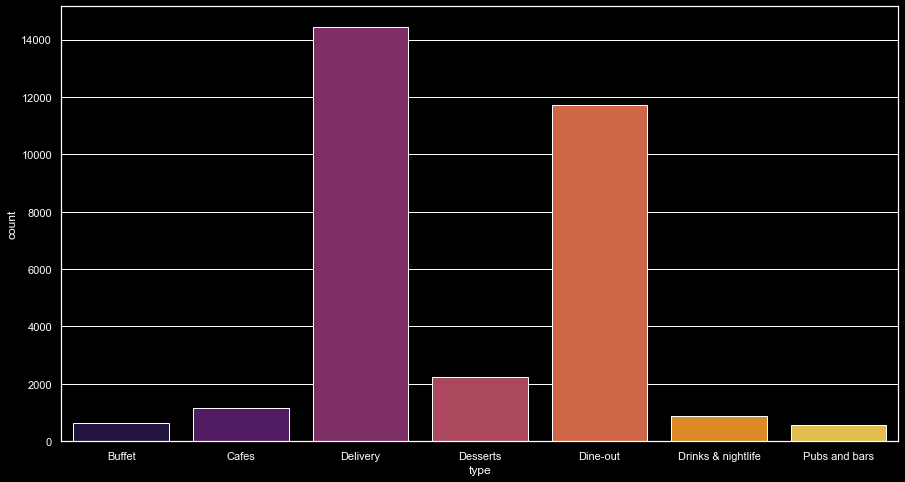

In [438]:
#Visualization of types of services
plt.figure(figsize = (15,8))
sns.countplot(x='type',data = zomato, palette='inferno')

<AxesSubplot:xlabel='rest_type', ylabel='rate'>

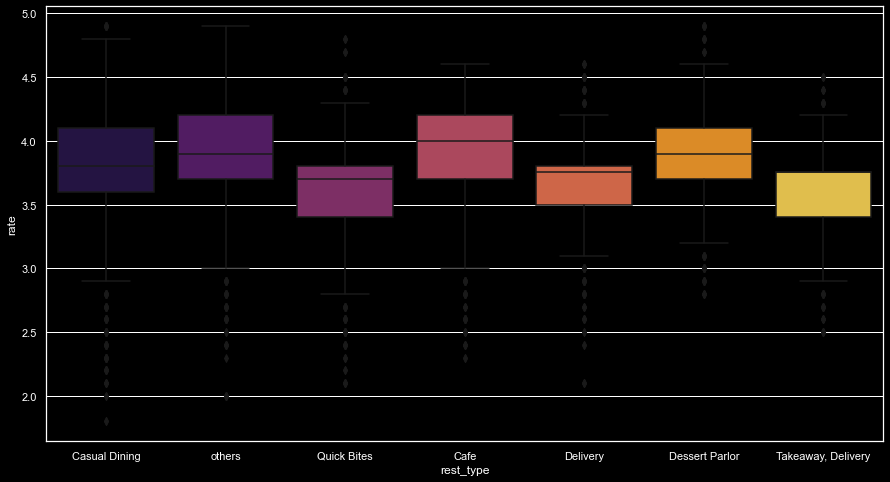

In [424]:
#Visualizing types of restaurants vs rating
plt.figure(figsize=(15,8))
sns.boxplot(x = 'rest_type', y = 'rate', data = zomato, palette = 'inferno')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 [Text(0, 0, '40.0'),
  Text(1, 0, '50.0'),
  Text(2, 0, '60.0'),
  Text(3, 0, '70.0'),
  Text(4, 0, '80.0'),
  Text(5, 0, '100.0'),
  Text(6, 0, '120.0'),
  Text(7, 0, '130.0'),
  Text(8, 0, '140.0'),
  Text(9, 0, '150.0'),
  Text(10, 0, '160.0'),
  Text(11, 0, '180.0'),
  Text(12, 0, '190.0'),
  Text(13, 0, '199.0'),
  Text(14, 0, '200.0'),
  Text(15, 0, '230.0'),
  Text(16, 0, '240.0'),
  Text(17, 0, '250.0'),
  Text(18, 0, '300.0'),
  Text(19, 0, '330.0'),
  Text(20, 0, '350.0'),
  Text(21, 0, '360.0'),
  Text(22, 0, '400.0'),
  Text(23, 0, '450.0'),
  Text(24, 0, '469.0'),
  Text(25, 0, '500.0'),
  Text(26, 0, '550.0'),
  Text(27, 0, '560.0'),
  Text(28, 0, '600.0'

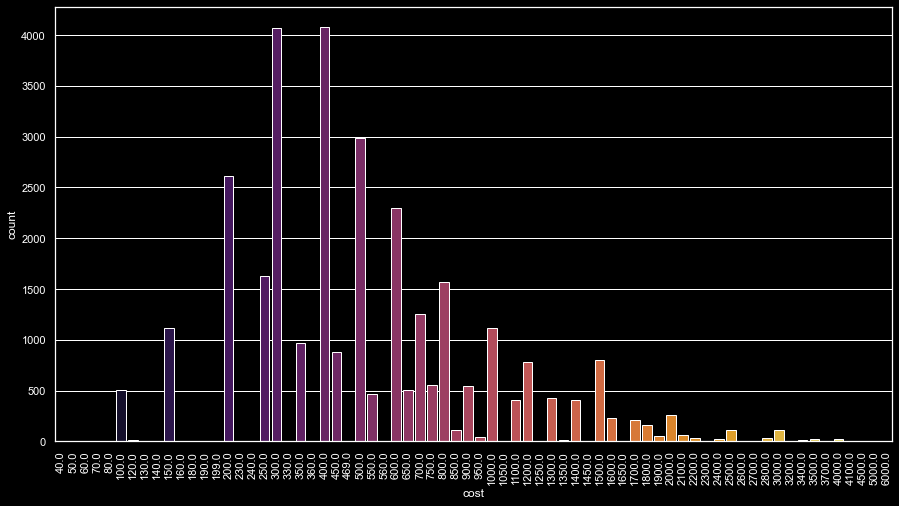

In [ ]:
#Orders in accordance to cost
plt.figure(figsize = (15,8))
sns.countplot(x='cost',data = zomato, palette='inferno')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='name'>

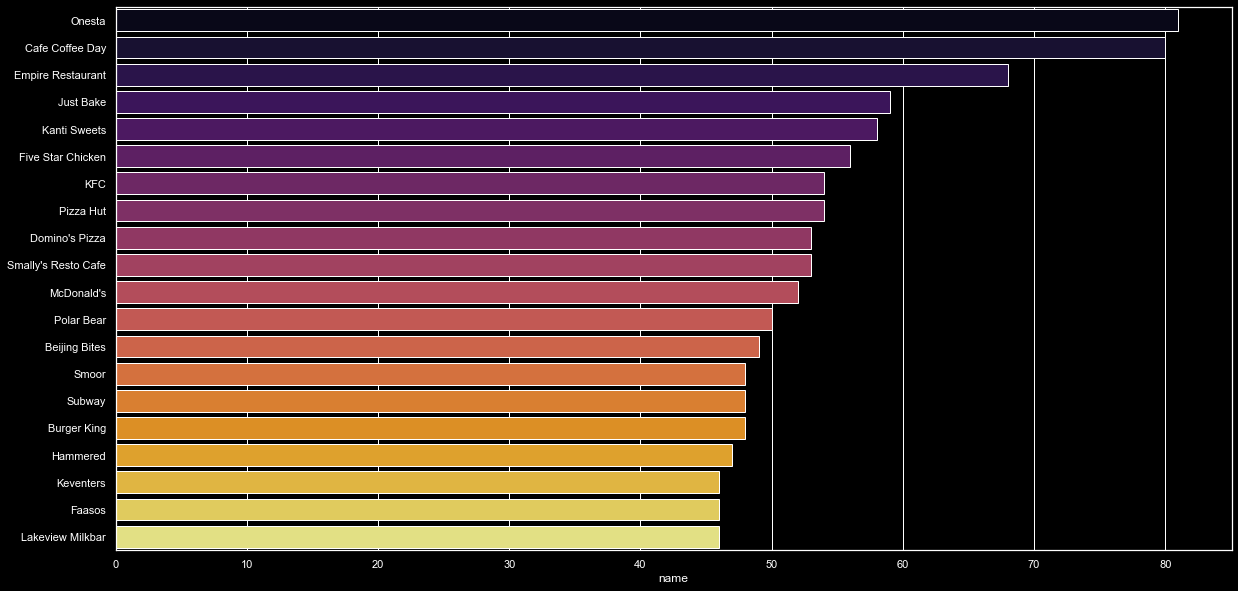

In [449]:
plt.figure(figsize=(20,10))
chain = zomato['name'].value_counts()[:20]
sns.barplot(x = chain, y = chain.index , palette='inferno')

<AxesSubplot:xlabel='rate'>

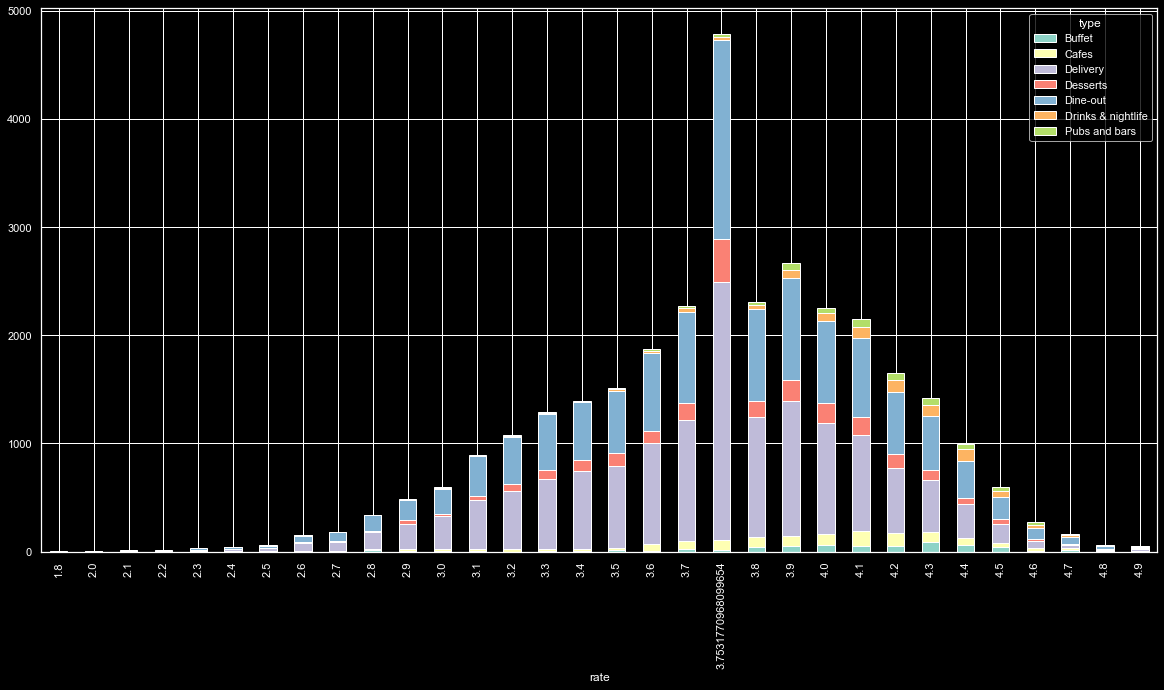

In [456]:
type_plt = pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind = 'bar', stacked= True, figsize=(20,10))

([<matplotlib.patches.Wedge at 0x250f4b3b970>,
 [Text(0.42590509840934343, 1.0142015811212914, 'Casual Dining'),
  Text(-1.0996694482797431, -0.02696487567421118, 'Casual Dining'),
  Text(0.02430430063934828, -1.0997314676640078, 'others'),
  Text(0.9406726699314739, -0.570206039992556, 'Quick Bites'),
  Text(1.0884651847425688, -0.15888216263421698, 'Casual Dining')])

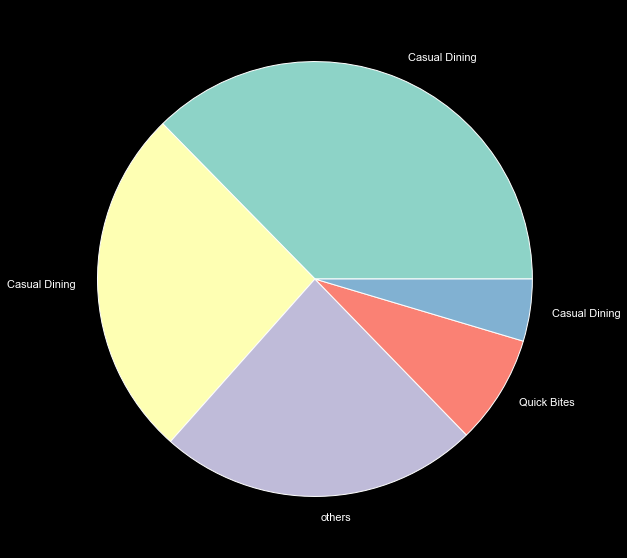

In [463]:
#Popularity of cuisines
plt.figure(figsize=(10,10))
data = zomato['rest_type'].value_counts()[:5]
plt.pie(data, labels=zomato['rest_type'][:5])
  